In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
ROOT_PATH='/content/drive/My Drive/Colab Notebooks/learning_ai'
sys.path.append(ROOT_PATH)

Mounted at /content/drive


In [ ]:
'''
google colabのセッション切れを防止する
https://flat-kids.net/2020/07/28/google-colab-%E3%82%BB%E3%83%83%E3%82%B7%E3%83%A7%E3%83%B3%E5%88%87%E3%82%8C%E3%82%92%E9%98%B2%E6%AD%A2%E3%81%99%E3%82%8B/
F12押してConsoleウインドウに下記を入力、Enter
'''

function ClickConnect(){
  console.log("60sごとに再接続");
  document.querySelector("colab-connect-button").click()
}
setInterval(ClickConnect,1000*60);

In [2]:
!pip install dlt

In [1]:
from common import config
config.GPU=True
from common.np import *
from model.deep_convnet import DeepConvNet
from common.optimizer import *
from common.trainer import Trainer
import dlt
from common.util import to_cpu,to_gpu

data = dlt.cifar.load_cifar10()
x_train=data.train_images
x_test=data.test_images
t_train=data.train_labels
t_test=data.test_labels

x_train=x_train.transpose(0,3,1,2).astype('f')
x_test=x_test.transpose(0,3,1,2).astype('f')
t_train=t_train.reshape(t_train.shape[0])
t_test=t_test.reshape(t_test.shape[0])

if GPU:
    x_train=to_gpu(x_train)
    x_test=to_gpu(x_test)
    t_train=to_gpu(t_train)
    t_test=to_gpu(t_test)

x_train/=255.
x_test/=255.

input_shape=(3,32,32)

layer_list=[['convres',[['conv',[64,3,3,1,1,2]], ['batchnorm',[0.9,None,None]],['relu',[]],['conv',[64,3,3,1,1,2]]]],
            ['batchnorm',[0.9,None,None]],['relu',[]],['pool',[2,2,0,2]],
            ['convres',[['conv',[128,3,3,1,1,2]],['batchnorm',[0.9,None,None]], ['relu',[]],['conv',[128,3,3,1,1,2]]]],
            ['batchnorm',[0.9,None,None]],['relu',[]],['pool',[2,2,0,2]],
            ['convres',[['conv',[256,3,3,1,1,2]],['batchnorm',[0.9,None,None]], ['relu',[]],['conv',[256,3,3,1,1,2]]]],
            ['batchnorm',[0.9,None,None]],['relu',[]],['conv',[256,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['pool',[2,2,0,2]],
            ['convres',[['conv',[512,3,3,1,1,2]],['batchnorm',[0.9,None,None]], ['relu',[]],['conv',[512,3,3,1,1,2]]]],
            ['batchnorm',[0.9,None,None]],['relu',[]],['conv',[512,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['pool',[2,2,0,2]],
            ['convres',[['conv',[512,3,3,1,1,2]], ['batchnorm',[0.9,None,None]],['relu',[]],['conv',[512,3,3,1,1,2]]]],
            ['batchnorm',[0.9,None,None]],['relu',[]],['conv',[512,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],
            ['gap',[]],['affine',[10,2]],['relu',[]]]

lr=0.001

max_epoch=20
batch_size=50
max_grad=None
eval_interval=500
eval_accuracy=True
show_distribution=False
# file_name=ROOT_PATH+'/pkl/DeepConvRes_cifar10/DeepConvRes_cifar10'
file_name=None

model=DeepConvNet(input_shape=input_shape,layer_list=layer_list,show_distribution=show_distribution)
for layer in model.layers:
    print(layer.__class__.__name__,layer.output_shape)

optimizer=Adam(lr)
trainer=Trainer(model,optimizer,file_name)

trainer.fit(x=x_train,t=t_train,x_test=x_test,t_test=t_test,max_epoch=max_epoch,batch_size=batch_size,max_grad=max_grad,eval_interval=eval_interval,eval_accuracy=eval_accuracy)

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------

ConvResNet (64, 32, 32)
BatchNormalization (64, 32, 32)
Relu (64, 32, 32)
Pooling (64, 16, 16)
ConvResNet (128, 16, 16)
BatchNormalization (128, 16, 16)
Relu (128, 16, 16)
Pooling (128, 8, 8)
ConvResNet (256, 8, 8)
BatchNormalization (256, 8, 8)
Relu (256, 8, 8)
Convolution (256, 8, 8)
BatchNormalization (256, 8, 8)
Relu (256, 8, 8)
Pooling (256, 4, 4)
ConvResNet (512, 4, 4)
BatchNormalization (512, 4, 4)
Relu (512, 4, 4)
Convolution (512, 4, 4)
BatchNormalization (512, 4, 4)
Relu (512, 4, 4)
Pooling (512, 2, 2)
ConvResNet (512, 2, 2)
BatchNormalization (512, 2, 2)
Relu (512, 2, 2)
Convolution (512, 2, 2)
BatchNormalization (512, 2, 2)
Relu (512, 2, 2)
GAP (512,)
Affine (10,)
Relu (10,)
| epoch 1 |  iter 1 / 1000 | time 1[s] | loss 5.59 | train_acc 0.10 | test_acc 0.10


KeyboardInterrupt: 

In [1]:
from common import config
config.GPU=True
from common.np import *
from model.deep_convnet import DeepConvNet
from common.optimizer import *
from common.trainer import Trainer
import dlt
from common.util import to_cpu,to_gpu

data = dlt.cifar.load_cifar10()
x_train=data.train_images
x_test=data.test_images
t_train=data.train_labels
t_test=data.test_labels

x_train=x_train.transpose(0,3,1,2).astype('float16')
x_aug1=x_train.transpose(0,1,3,2)
x_aug2=x_aug1[:,::-1,:,:]
x_aug3=x_aug2.transpose(0,1,3,2)
x_aug4=x_aug3[:,::-1,:,:]
x_aug5=x_aug4.transpose(0,1,3,2)
x_aug6=x_aug5[:,::-1,:,:]
x_aug7=x_aug6.transpose(0,1,3,2)

x_train=np.vstack([x_train,x_aug1,x_aug2,x_aug3,x_aug4,x_aug5,x_aug6,x_aug7])

x_test=x_test.transpose(0,3,1,2).astype('float16')

t_train=np.vstack([t_train,t_train,t_train,t_train,t_train,t_train,t_train,t_train])    #data augmentation
t_train=t_train.reshape(t_train.shape[0])

t_test=t_test.reshape(t_test.shape[0])

if GPU:
    x_train=to_gpu(x_train)
    x_test=to_gpu(x_test)
    t_train=to_gpu(t_train)
    t_test=to_gpu(t_test)

x_train/=255.
x_test/=255.

input_shape=(3,32,32)

layer_list=[['convres',[['conv',[64,3,3,1,1,2]], ['batchnorm',[0.9,None,None]],['relu',[]],['conv',[64,3,3,1,1,2]]]],
            ['batchnorm',[0.9,None,None]],['relu',[]],['pool',[2,2,0,2]],
            ['convres',[['conv',[128,3,3,1,1,2]],['batchnorm',[0.9,None,None]], ['relu',[]],['conv',[128,3,3,1,1,2]]]],
            ['batchnorm',[0.9,None,None]],['relu',[]],['pool',[2,2,0,2]],
            ['convres',[['conv',[256,3,3,1,1,2]],['batchnorm',[0.9,None,None]], ['relu',[]],['conv',[256,3,3,1,1,2]]]],
            ['batchnorm',[0.9,None,None]],['relu',[]],['conv',[256,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['pool',[2,2,0,2]],
            ['convres',[['conv',[512,3,3,1,1,2]],['batchnorm',[0.9,None,None]], ['relu',[]],['conv',[512,3,3,1,1,2]]]],
            ['batchnorm',[0.9,None,None]],['relu',[]],['conv',[512,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['pool',[2,2,0,2]],
            ['convres',[['conv',[512,3,3,1,1,2]], ['batchnorm',[0.9,None,None]],['relu',[]],['conv',[512,3,3,1,1,2]]]],
            ['batchnorm',[0.9,None,None]],['relu',[]],['conv',[512,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],
            ['gap',[]],['affine',[10,2]],['relu',[]]]

lr=0.001

max_epoch=12
batch_size=32
max_grad=None
eval_interval=100
eval_accuracy=True
show_distribution=False
# file_name=ROOT_PATH+'/pkl/DeepConvRes_cifar10/DeepConvRes_cifar10_aug4/DeepConvRes_cifar10_aug4'
file_name=None

model=DeepConvNet(input_shape=input_shape,layer_list=layer_list,show_distribution=show_distribution)
# model.load_params(ROOT_PATH+"/pkl/DeepConvRes_cifar10/DeepConvRes_cifar10_aug4/DeepConvRes_cifar10_aug4_0.18182591648899527.pkl")

for layer in model.layers:
    print(layer.__class__.__name__,layer.output_shape)

optimizer=Adam(lr)
trainer=Trainer(model,optimizer,file_name)

trainer.fit(x=x_train,t=t_train,max_epoch=max_epoch,batch_size=batch_size,max_grad=max_grad,eval_interval=eval_interval,eval_accuracy=eval_accuracy,x_test=x_test,t_test=t_test)

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------

ConvResNet (64, 32, 32)
BatchNormalization (64, 32, 32)
Relu (64, 32, 32)
Pooling (64, 16, 16)
ConvResNet (128, 16, 16)
BatchNormalization (128, 16, 16)
Relu (128, 16, 16)
Pooling (128, 8, 8)
ConvResNet (256, 8, 8)
BatchNormalization (256, 8, 8)
Relu (256, 8, 8)
Convolution (256, 8, 8)
BatchNormalization (256, 8, 8)
Relu (256, 8, 8)
Pooling (256, 4, 4)
ConvResNet (512, 4, 4)
BatchNormalization (512, 4, 4)
Relu (512, 4, 4)
Convolution (512, 4, 4)
BatchNormalization (512, 4, 4)
Relu (512, 4, 4)
Pooling (512, 2, 2)
ConvResNet (512, 2, 2)
BatchNormalization (512, 2, 2)
Relu (512, 2, 2)
Convolution (512, 2, 2)
BatchNormalization (512, 2, 2)
Relu (512, 2, 2)
GAP (512,)
Affine (10,)
Relu (10,)


OutOfMemoryError: Out of memory allocating 471,859,200 bytes (allocated so far: 7,394,918,400 bytes).

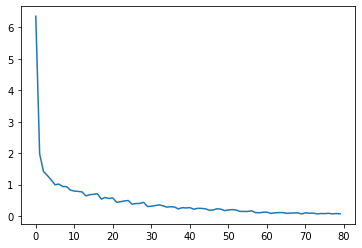

In [ ]:
import matplotlib.pyplot as plt

with open(ROOT_PATH+'/pkl/DeepConvRes_cifar10/DeepConvRes_cifar10_loss.pkl','rb') as f:
    loss_list=pickle.load(f)
    
train_loss_list=loss_list[0]
plt.plot(train_loss_list)
plt.show()

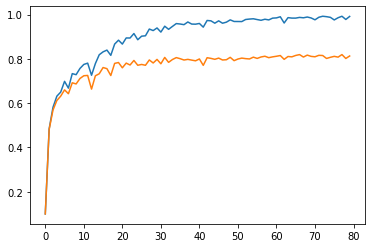

In [ ]:
import matplotlib.pyplot as plt

with open(ROOT_PATH+'/pkl/DeepConvRes_cifar10/DeepConvRes_cifar10_acc.pkl','rb') as f:
    acc_list=pickle.load(f)
    
train_acc_list=acc_list[0]
test_acc_list=acc_list[1]

plt.plot(train_acc_list)
plt.plot(test_acc_list)
plt.show()

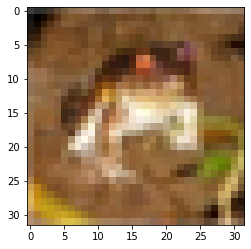

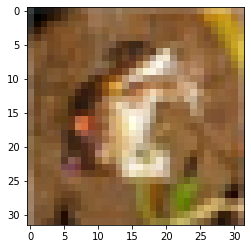

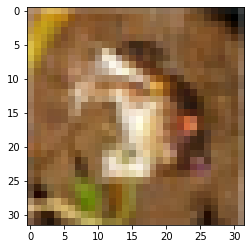

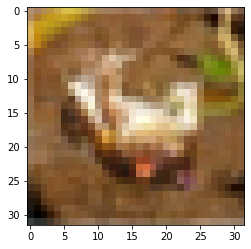

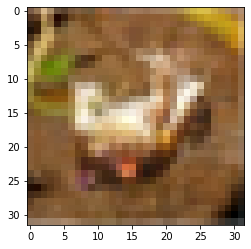

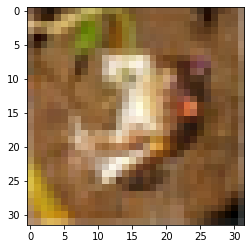

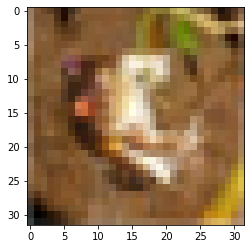

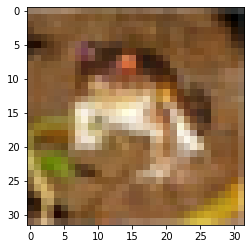

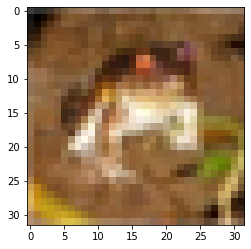

In [ ]:
import matplotlib.pyplot as plt

data = dlt.cifar.load_cifar10()
x_train=data.train_images

plt.imshow(x_train[0])
plt.show()

x_aug1=x_train.transpose(0,2,1,3)
plt.imshow(x_aug1[0])
plt.show()

x_aug2=x_aug1[:,:,::-1,:]
plt.imshow(x_aug2[0])
plt.show()

x_aug3=x_aug2.transpose(0,2,1,3)
plt.imshow(x_aug3[0])
plt.show()

x_aug4=x_aug3[:,:,::-1,:]
plt.imshow(x_aug4[0])
plt.show()

x_aug5=x_aug4.transpose(0,2,1,3)
plt.imshow(x_aug5[0])
plt.show()

x_aug6=x_aug5[:,:,::-1,:]
plt.imshow(x_aug6[0])
plt.show()

x_aug7=x_aug6.transpose(0,2,1,3)
plt.imshow(x_aug7[0])
plt.show()

x_aug8=x_aug7[:,:,::-1,:]
plt.imshow(x_aug8[0])
plt.show()